# 6.2 Exploratory Visual Analysis

1. Importing Libraries and Data
2. Correlation Matrices and Heatmaps
3. Scatterplots (includes answers to 6.1 questions)
4. Categorical Plot (not working)
5. Pair Plots
6. New Hypotheses

## 1. Importing Libraries and Data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Double-checking matplotlib version

matplotlib.__version__

'3.4.3'

In [3]:
# Ensuring charts will be displayed in notebook

%matplotlib inline

In [4]:
# Defining path

path = r'C:\Users\Lex\OneDrive\Data Analytics\Data Immersion - Advanced Analytics\Metropolitan Housing Analysis\Data'

In [5]:
# Importing dataframes

dfstate = pd.read_csv(os.path.join(path, 'Master v8 State Subset.csv'))

In [6]:
dfmetro = pd.read_csv(os.path.join(path, 'Master v8 Metro Subset.csv'))

In [7]:
dfstate.dtypes

Year                                            int64
Area                                           object
CBSA                                            int64
State Code                                     object
Type                                           object
Key                                            object
Annual SF Home Appreciation (HPI)             float64
Annual SF Home Appreciation (ZHVI)            float64
SF Home State Average Value                   float64
Population Estimate                             int64
% Population Change                           float64
% Migration Pop Change                        float64
% Int Mig Pop Change                          float64
% Dom Mig Pop Change                          float64
Total Building Permits                        float64
% SF Building Permits                         float64
% Multi-Unit Building Permits                 float64
% 2 Unit Building Permits                     float64
% 3-4 Unit Building Permits 

In [8]:
dfmetro.dtypes

Year                                            int64
City (Zillow)                                  object
Area                                           object
CBSA                                            int64
Type                                           object
Key                                            object
Unprotected Acreage                           float64
% 0 Car Households                            float64
% 1 Car Households                            float64
% 2+ Car Households                           float64
Residential Density                           float64
Population Density                            float64
Employment Density                            float64
Walkability Index W.AVG                       float64
Max Walkability Index                         float64
Transit Access W.AVG                          float64
Annual SF Home Appreciation (HPI)             float64
Annual SF Home Appreciation (ZHVI)            float64
SF Home Metropolitan Average

In [9]:
dfstate.columns

Index(['Year', 'Area', 'CBSA', 'State Code', 'Type', 'Key',
       'Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)', 'SF Home State Average Value',
       'Population Estimate', '% Population Change', '% Migration Pop Change',
       '% Int Mig Pop Change', '% Dom Mig Pop Change',
       'Total Building Permits', '% SF Building Permits',
       '% Multi-Unit Building Permits', '% 2 Unit Building Permits',
       '% 3-4 Unit Building Permits', '% 5+ Unit Building Permits',
       'Total Housing Units', '% SF Houses', '% Multi-Unit Buildings',
       '% 1-Unit Detached Houses', '% 1-Unit Attached Houses',
       '% 2 Unit Buildings', '% 3-4 Unit Buildings', '% 5-9 Unit Buildings',
       '% 10-19 Unit Buildings', '% 20+ Unit Buildings', '% Mobile Homes',
       '% Boats, RVs, Vans, Etc.', 'Owner-Occupied Units (Value Computations)',
       '% Value <$50,000', '% Value $50,000-$99,999',
       '% Value $100,000-$149,999', '% Value $150,000-$199,999',
      

In [10]:
dfstatesub = dfstate[['Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)', 'SF Home State Average Value',
       'Population Estimate', '% Population Change', '% Migration Pop Change',
       '% Int Mig Pop Change', '% Dom Mig Pop Change',
       'Total Building Permits', '% SF Building Permits',
       '% Multi-Unit Building Permits', '% 2 Unit Building Permits',
       '% 3-4 Unit Building Permits', '% 5+ Unit Building Permits',
       'Total Housing Units', '% SF Houses', '% Multi-Unit Buildings',
       '% 1-Unit Detached Houses', '% 1-Unit Attached Houses',
       '% 2 Unit Buildings', '% 3-4 Unit Buildings', '% 5-9 Unit Buildings',
       '% 10-19 Unit Buildings', '% 20+ Unit Buildings', '% Mobile Homes',
       '% Boats, RVs, Vans, Etc.', 'Owner-Occupied Units (Value Computations)',
       '% Value <$50,000', '% Value $50,000-$99,999',
       '% Value $100,000-$149,999', '% Value $150,000-$199,999',
       '% Value $200,000-$299,999', '% Value $300,000-$499,999',
       '% Value $500,000-$999,999', '% Value $1,000,000+',
       'Owner-Occupied Unit Value Median (Dollars)', 'Rent Median (Dollars)',
       'Occupied Units Paying Rent', '% GRAPI <15%', '% GRAPI 15-19.9%',
       '% GRAPI 20-24.9%', '% GRAPI 25-29.9%', '% GRAPI 30-34.9%',
       '% GRAPI >35%', '% Surplus/Deficit of Revenue', '% Revenue from Taxes',
       'Revenue per Capita', 'Tax Revenue per Capita',
       'Expenditure per Capita', 'Surplus/Deficit per Capita']]

In [11]:
pd.options.display.max_columns = None

In [12]:
dfstatesub

Annual SF Home Appreciation (HPI)  Annual SF Home Appreciation (ZHVI)  \
0                            -0.037483                                 NaN   
1                            -0.033588                           -0.046743   
2                            -0.005397                           -0.017797   
3                            -0.007190                            0.011499   
4                             0.012133                            0.018957   
..                                 ...                                 ...   
619                           0.013165                            0.006544   
620                           0.036697                            0.035111   
621                           0.041997                            0.047869   
622                           0.050554                            0.043612   
623                           0.116283                            0.071472   

     SF Home State Average Value  Population Estimate  % Population Change  \
0                    126384.5833              4785437             0.001111   
1                    120477.0000              4799069             0.002849   
2                    118332.9167              4815588             0.003442   
3                    119693.5833              4830081             0.003010   
4                    121962.5833              4841799             0.002426   
..                           ...                  ...                  ...   
619                  231081.4167               578931            -0.009045   
620                  239194.9167               577601            -0.002297   
621                  250644.8333               578759             0.002005   
622                  261575.8333               577267             0.000721   
623                  280271.0909               578803             0.002661   

     % Migration Pop Change  % Int Mig Pop Change  % Dom Mig Pop Change  \
0                  0.000454              0.000193              0.000260   
1                  0.000579              0.000975             -0.000396   
2                  0.001188              0.001212             -0.000024   
3                  0.001525              0.001048              0.000477   
4                  0.000564              0.000763             -0.000199   
..                      ...                   ...                   ...   
619               -0.013262              0.001036             -0.014298   
620               -0.005719              0.000891             -0.006610   
621               -0.000821              0.000931             -0.001752   
622                0.000491              0.000007              0.000484   
623                0.002370              0.000201              0.002169   

     Total Building Permits  % SF Building Permits  \
0                   11261.0               0.772756   
1                   11667.0               0.759235   
2                   13506.0               0.679994   
3                   11763.0               0.788744   
4                   13507.0               0.714000   
..                      ...                    ...   
619                  1926.0               0.760125   
620                  1812.0               0.846026   
621                  1708.0               0.890515   
622                  2128.0               0.830827   
623                  2706.0               0.797487   

     % Multi-Unit Building Permits  % 2 Unit Building Permits  \
0                         0.227244                   0.009591   
1                         0.240765                   0.002743   
2                         0.320006                   0.003110   
3                         0.211256                   0.002890   
4                         0.286000                   0.009032   
..                             ...                        ...   
619                       0.239875                   0.037383   
620                       0.153974                   0.023179

## 2. Correlation Matrices and Heatmaps

In [13]:
dfstatesub.corr()

Annual SF Home Appreciation (HPI)  \
Annual SF Home Appreciation (HPI)                                    1.000000   
Annual SF Home Appreciation (ZHVI)                                   0.963653   
SF Home State Average Value                                          0.317651   
Population Estimate                                                  0.070688   
% Population Change                                                  0.237724   
% Migration Pop Change                                               0.334939   
% Int Mig Pop Change                                                -0.018027   
% Dom Mig Pop Change                                                 0.344132   
Total Building Permits                                               0.283719   
% SF Building Permits                                               -0.153872   
% Multi-Unit Building Permits                                        0.153872   
% 2 Unit Building Permits                                           -0.032038   
% 3-4 Unit Building Permits                                         -0.099234   
% 5+ Unit Building Permits                                           0.165663   
Total Housing Units                                                  0.074851   
% SF Houses                                                         -0.036420   
% Multi-Unit Buildings                                               0.059229   
% 1-Unit Detached Houses                                            -0.029936   
% 1-Unit Attached Houses                                             0.006571   
% 2 Unit Buildings                                                  -0.133510   
% 3-4 Unit Buildings                                                -0.035705   
% 5-9 Unit Buildings                                                 0.036348   
% 10-19 Unit Buildings                                               0.111730   
% 20+ Unit Buildings                                                 0.131956   
% Mobile Homes                                                      -0.069217   
% Boats, RVs, Vans, Etc.                                             0.127902   
Owner-Occupied Units (Value Computations)                            0.055640   
% Value <$50,000                                                    -0.061224   
% Value $50,000-$99,999                                             -0.078731   
% Value $100,000-$149,999                                           -0.055586   
% Value $150,000-$199,999                                           -0.027691   
% Value $200,000-$299,999                                            0.002623   
% Value $300,000-$499,999                                            0.063141   
% Value $500,000-$999,999                                            0.069752   
% Value $1,000,000+                                                  0.080271   
Owner-Occupied Unit Value Median (Dollars)                           0.074921   
Rent Median (Dollars)                                                0.235845   
Occupied Units Paying Rent                                           0.101913   
% GRAPI <15%                                                         0.055238   
% GRAPI 15-19.9%                                                     0.128952   
% GRAPI 20-24.9%                                                     0.069117   
% GRAPI 25-29.9%                                                    -0.013944   
% GRAPI 30-34.9%                                                    -0.058671   
% GRAPI >35%                                                        -0.085115   
% Surplus/Deficit of Revenue                                         0.325705   
% Revenue from Taxes                                                -0.030690   
Revenue per Capita                                                  -0.054499   
Tax Revenue per Capita                                              -0.045926   
Expenditure per Capita                                              -0.1659

Text(0.5, 1.0, 'State Correlation Matrix')

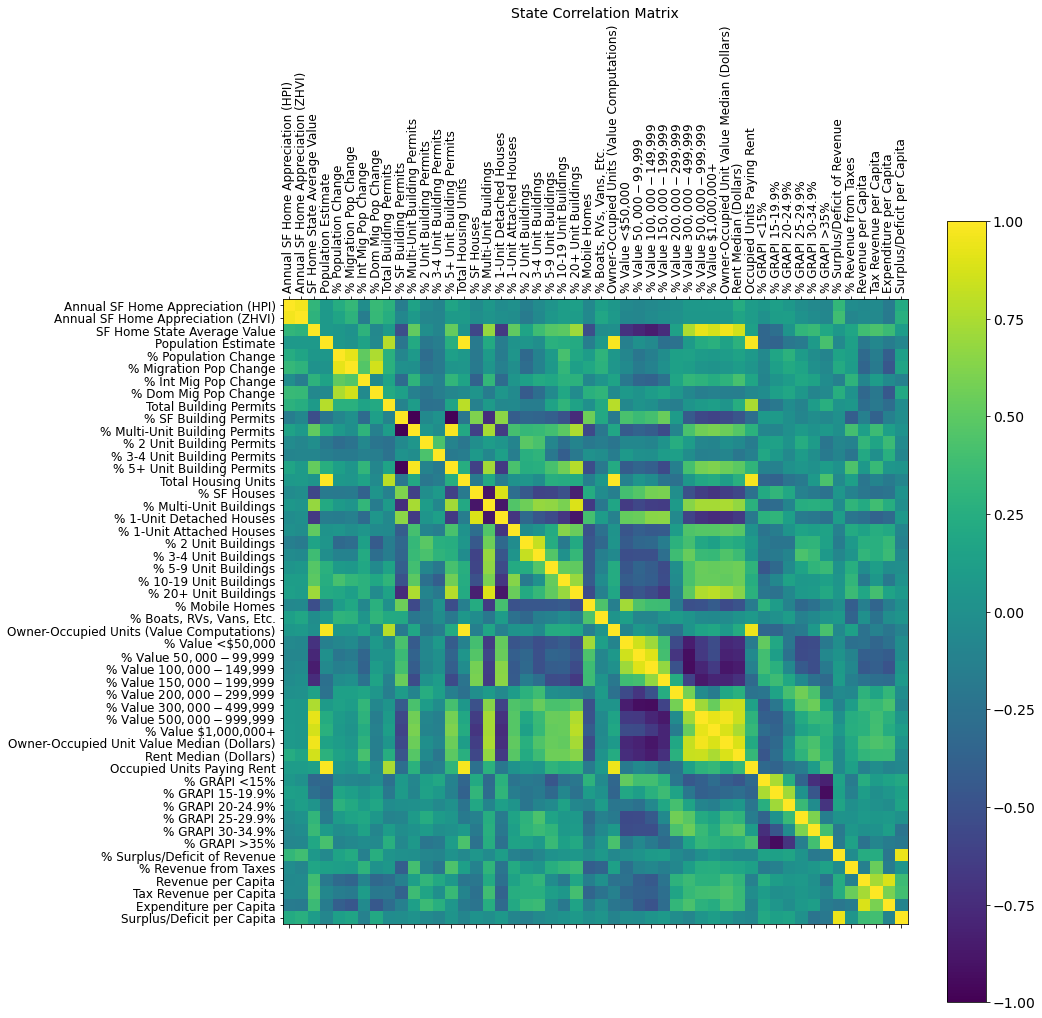

In [14]:
# State set heatmap

f = plt.figure(figsize=(14, 14)) # figure size 
plt.matshow(dfstatesub.corr(), fignum=f.number) # type of plot
plt.xticks(range(dfstatesub.shape[1]), dfstatesub.columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(dfstatesub.shape[1]), dfstatesub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('State Correlation Matrix', fontsize=14) # add title

In [15]:
dfmetro.columns

Index(['Year', 'City (Zillow)', 'Area', 'CBSA', 'Type', 'Key',
       'Unprotected Acreage', '% 0 Car Households', '% 1 Car Households',
       '% 2+ Car Households', 'Residential Density', 'Population Density',
       'Employment Density', 'Walkability Index W.AVG',
       'Max Walkability Index', 'Transit Access W.AVG',
       'Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)',
       'SF Home Metropolitan Average Value', 'Population Estimate',
       '% Population Change', '% Migration Pop Change', '% Int Mig Pop Change',
       '% Dom Mig Pop Change', '% SF Building Permits',
       '% 2 Unit Building Permits', '% 3-4 Unit Building Permits',
       '% 5+ Unit Building Permits', '% Multi-Unit Building Permits',
       'Total Housing Units', '% 1-Unit Detached Houses',
       '% 1-Unit Attached Houses', '% SF Houses', '% 2 Unit Buildings',
       '% 3-4 Unit Buildings', '% 5-9 Unit Buildings',
       '% 10-19 Unit Buildings', '% 20+ Unit Buildings',
    

In [16]:
dfmetrosub = dfmetro[['Unprotected Acreage', '% 0 Car Households', '% 1 Car Households',
       '% 2+ Car Households', 'Residential Density', 'Population Density',
       'Employment Density', 'Walkability Index W.AVG',
       'Max Walkability Index', 'Transit Access W.AVG',
       'Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)',
       'SF Home Metropolitan Average Value', 'Population Estimate',
       '% Population Change', '% Migration Pop Change', '% Int Mig Pop Change',
       '% Dom Mig Pop Change', 'Total Housing Units', '% 1-Unit Detached Houses',
       '% 1-Unit Attached Houses', '% SF Houses', '% 2 Unit Buildings',
       '% 3-4 Unit Buildings', '% 5-9 Unit Buildings',
       '% 10-19 Unit Buildings', '% 20+ Unit Buildings',
       '% Multi-Unit Buildings', '% Mobile Homes', '% Boats, RVs, Vans, Etc.',
       'Owner-Occupied Units (Value Computations)', '% Value <$50,000',
       '% Value $50,000-$99,999', '% Value $100,000-$149,999',
       '% Value $150,000-$199,999', '% Value $200,000-$299,999',
       '% Value $300,000-$499,999', '% Value $500,000-$999,999',
       '% Value $1,000,000+', 'Owner-Occupied Unit Value Median (Dollars)',
       'Rent Median (Dollars)', 'Occupied Units Paying Rent', '% GRAPI <15%',
       '% GRAPI 15-19.9%', '% GRAPI 20-24.9%', '% GRAPI 25-29.9%',
       '% GRAPI 30-34.9%', '% GRAPI >35%']]

In [17]:
dfmetrosub.corr()

Unprotected Acreage  \
Unprotected Acreage                                    1.000000   
% 0 Car Households                                    -0.073262   
% 1 Car Households                                    -0.049969   
% 2+ Car Households                                    0.067096   
Residential Density                                    0.055912   
Population Density                                     0.117452   
Employment Density                                     0.138810   
Walkability Index W.AVG                                0.065617   
Max Walkability Index                                  0.408783   
Transit Access W.AVG                                   0.335362   
Annual SF Home Appreciation (HPI)                      0.044956   
Annual SF Home Appreciation (ZHVI)                     0.025314   
SF Home Metropolitan Average Value                     0.152692   
Population Estimate                                    0.472189   
% Population Change                                    0.199374   
% Migration Pop Change                                 0.077640   
% Int Mig Pop Change                                   0.132245   
% Dom Mig Pop Change                                   0.052293   
Total Housing Units                                    0.469805   
% 1-Unit Detached Houses                              -0.209978   
% 1-Unit Attached Houses                               0.142522   
% SF Houses                                           -0.165947   
% 2 Unit Buildings                                    -0.129818   
% 3-4 Unit Buildings                                   0.079268   
% 5-9 Unit Buildings                                   0.167760   
% 10-19 Unit Buildings                                 0.289551   
% 20+ Unit Buildings                                   0.306097   
% Multi-Unit Buildings                                 0.230371   
% Mobile Homes                                        -0.071660   
% Boats, RVs, Vans, Etc.                               0.068055   
Owner-Occupied Units (Value Computations)              0.500537   
% Value <$50,000                                      -0.166521   
% Value $50,000-$99,999                               -0.265904   
% Value $100,000-$149,999                             -0.101074   
% Value $150,000-$199,999                              0.141443   
% Value $200,000-$299,999                              0.246098   
% Value $300,000-$499,999                              0.214063   
% Value $500,000-$999,999                              0.090761   
% Value $1,000,000+                                    0.029897   
Owner-Occupied Unit Value Median (Dollars)             0.152190   
Rent Median (Dollars)                                  0.248561   
Occupied Units Paying Rent                             0.410661   
% GRAPI <15%                                          -0.035065   
% GRAPI 15-19.9%                                       0.047819   
% GRAPI 20-24.9%                                       0.041777   
% GRAPI 25-29.9%                                       0.011546   
% GRAPI 30-34.9%                                      -0.002627   
% GRAPI >35%                                          -0.014057   

                                            % 0 Car Households  \
Unprotected Acreage                                  -0.073262   
% 0 Car Households                                    1.000000   
% 1 Car Households                                    0.485534   
% 2+ Car Households                                  -0.773813   
Residential Density                                   0.262711   
Population Density                                    0.239578   
Employment Density                                    0.210906   
Walkability Index W.AVG                              -0.024593   
Max Walkability Index                                -0.052183   
Transit Access W.AVG                                  0.239648   
Annual SF Home Appreciation (HPI) 

Text(0.5, 1.0, 'Metro Correlation Matrix')

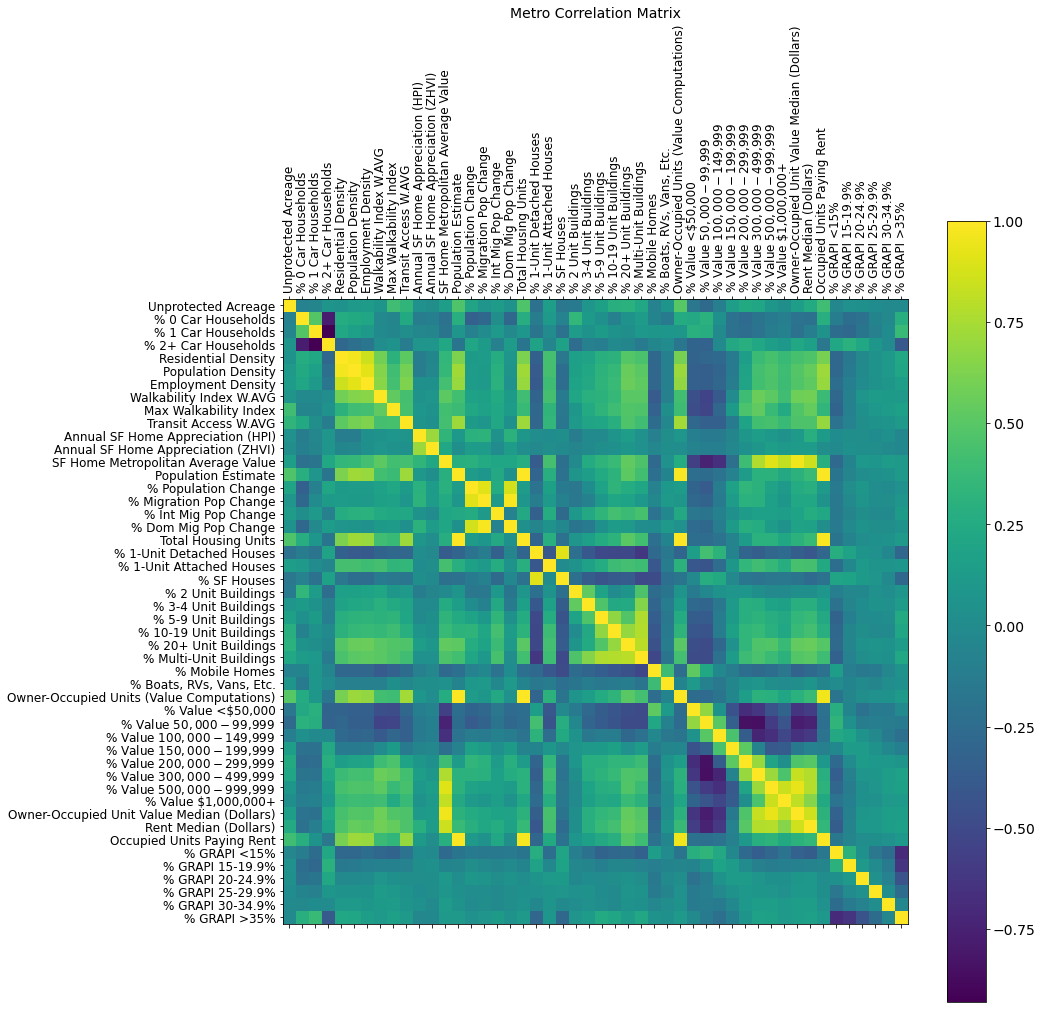

In [18]:
# Metro set heatmap

f = plt.figure(figsize=(14, 14)) # figure size 
plt.matshow(dfmetrosub.corr(), fignum=f.number) # type of plot
plt.xticks(range(dfmetrosub.shape[1]), dfmetrosub.columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(dfmetrosub.shape[1]), dfmetrosub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Metro Correlation Matrix', fontsize=14) # add title

In [19]:
dfstatesub2 = dfstate[['Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)', 'SF Home State Average Value', '% Population Change', '% Migration Pop Change',
       '% Int Mig Pop Change', '% Dom Mig Pop Change',
       '% SF Building Permits',
       '% Multi-Unit Building Permits', '% 2 Unit Building Permits',
       '% 3-4 Unit Building Permits', '% 5+ Unit Building Permits', '% SF Houses', '% Multi-Unit Buildings',
       '% 1-Unit Detached Houses', '% 1-Unit Attached Houses',
       '% 2 Unit Buildings', '% 3-4 Unit Buildings', '% 5-9 Unit Buildings',
       '% 10-19 Unit Buildings', '% 20+ Unit Buildings',
       'Owner-Occupied Unit Value Median (Dollars)', 'Rent Median (Dollars)', '% Surplus/Deficit of Revenue', '% Revenue from Taxes',
       'Revenue per Capita', 'Tax Revenue per Capita',
       'Expenditure per Capita', 'Surplus/Deficit per Capita']]

Text(0.5, 1.0, 'State Correlation Heatmap #2')

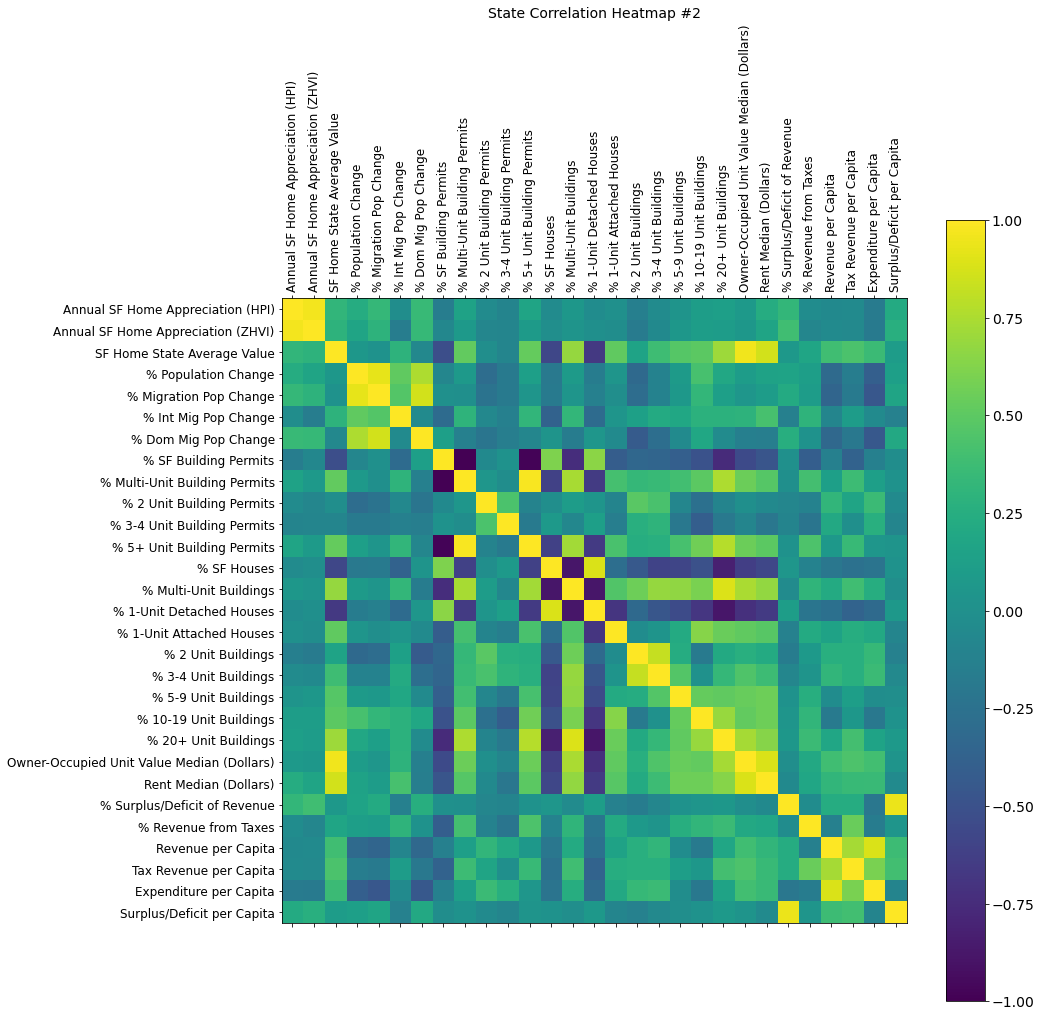

In [20]:
# Paired down State set heatmap

f = plt.figure(figsize=(14, 14)) # figure size 
plt.matshow(dfstatesub2.corr(), fignum=f.number) # type of plot
plt.xticks(range(dfstatesub2.shape[1]), dfstatesub2.columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(dfstatesub2.shape[1]), dfstatesub2.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('State Correlation Heatmap #2', fontsize=14) # add title

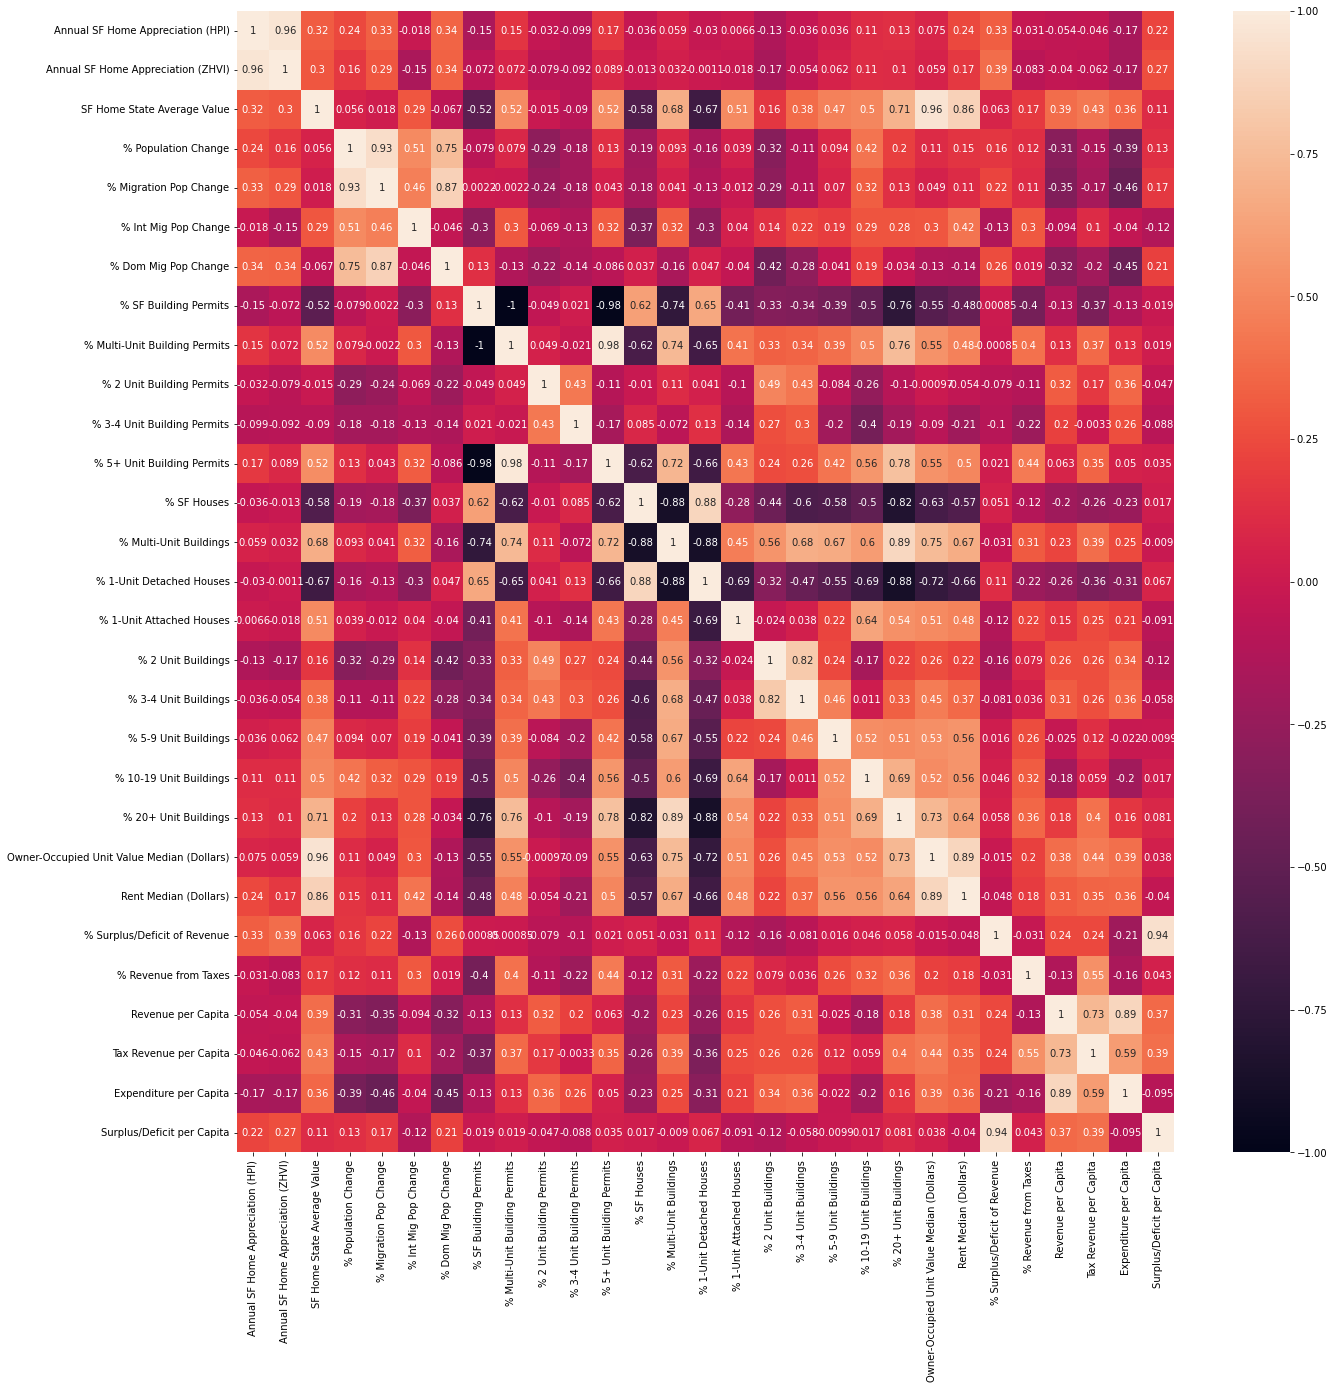

In [21]:
# Paired down State sub heatmap #2
f,ax = plt.subplots(figsize=(21,21))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(dfstatesub2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
# place the correlation coefficients onto the heatmap.

In [22]:
dfmetrosub2 = dfmetro[['Unprotected Acreage', '% 0 Car Households', '% 1 Car Households',
       '% 2+ Car Households', 'Residential Density', 'Population Density',
       'Employment Density', 'Walkability Index W.AVG',
       'Max Walkability Index', 'Transit Access W.AVG',
       'Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)',
       'SF Home Metropolitan Average Value', 'Population Estimate',
       '% Population Change', '% Migration Pop Change', '% Int Mig Pop Change',
       '% Dom Mig Pop Change', '% 1-Unit Detached Houses',
       '% 1-Unit Attached Houses', '% SF Houses', '% 2 Unit Buildings',
       '% 3-4 Unit Buildings', '% 5-9 Unit Buildings',
       '% 10-19 Unit Buildings', '% 20+ Unit Buildings',
       '% Multi-Unit Buildings', '% Mobile Homes', '% Boats, RVs, Vans, Etc.', 'Owner-Occupied Unit Value Median (Dollars)',
       'Rent Median (Dollars)']]

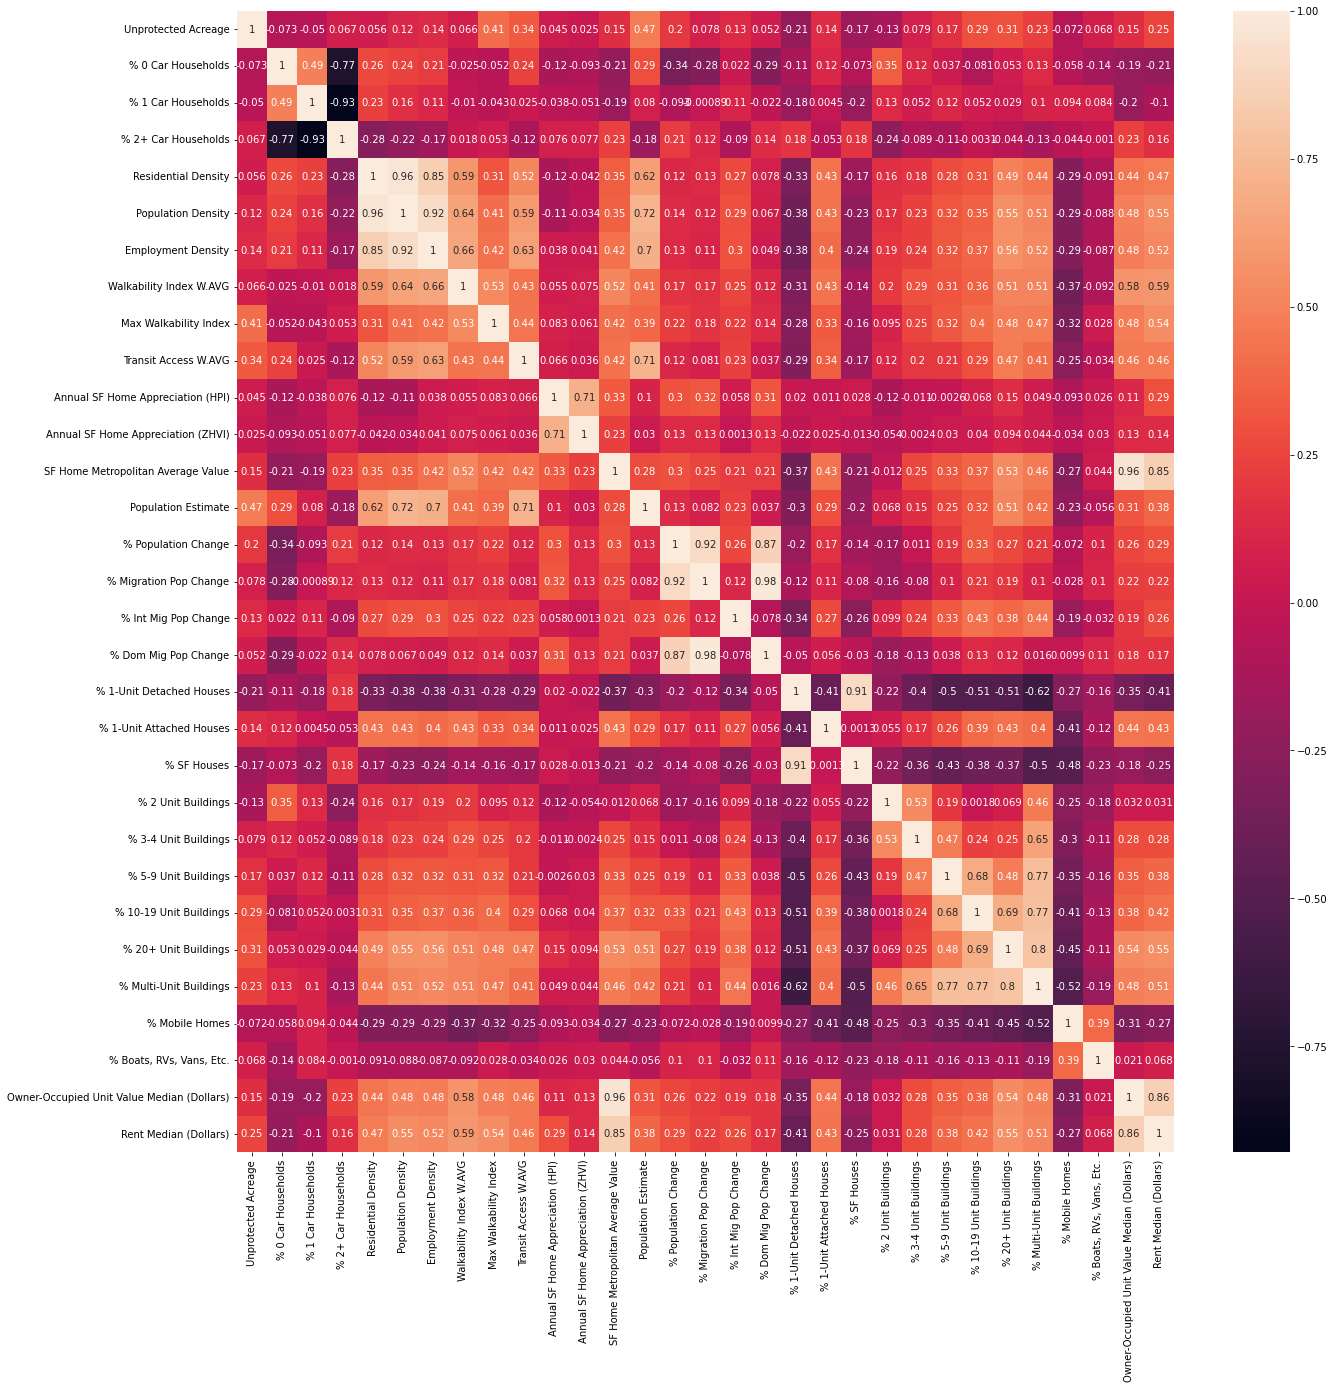

In [23]:
# Paired down Metro sub heatmap
f,ax = plt.subplots(figsize=(21,21))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(dfmetrosub2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
# place the correlation coefficients onto the heatmap.

Q3:
Each number in the warmer colored heatmaps represents the correlation coefficient between the two variables at that intersection. 1 implies a direct correlation, -1 an indirect correlation, and 0 no correlation. 

## 3. Scatterplots

###### Do more people move to metropolitan areas that build more multi-unit housing than those that don't?

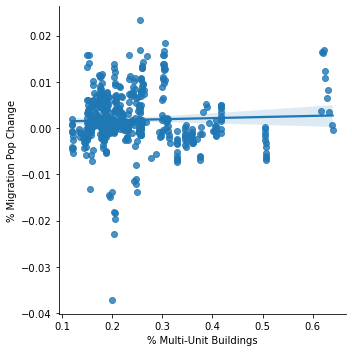

In [24]:
# State: Share of population change due to net migration vs. share of existing buildings that are multi-unit

sns.lmplot(x = '% Multi-Unit Buildings', y = '% Migration Pop Change', data = dfstatesub2)

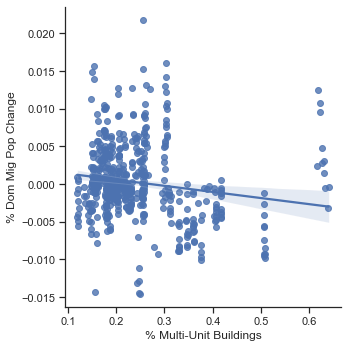

In [100]:
# State: Share of population change due to domestic migration vs. share of existing buildings that are multi-unit

sns.lmplot(x = '% Multi-Unit Buildings', y = '% Dom Mig Pop Change', data = dfstatesub2)

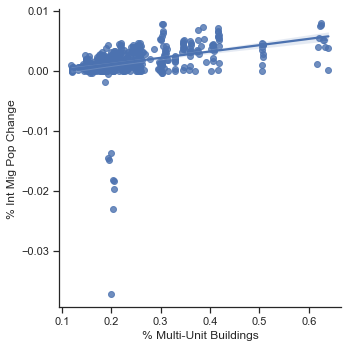

In [101]:
# State: Share of population change due to international migration vs. share of existing buildings that are multi-unit

sns.lmplot(x = '% Multi-Unit Buildings', y = '% Int Mig Pop Change', data = dfstatesub2)

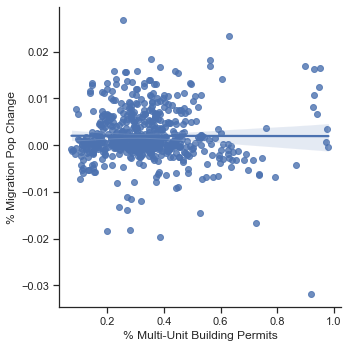

In [102]:
# State: Share of population change due to net migration vs. share of building permits for multi-unit structures

sns.lmplot(x = '% Multi-Unit Building Permits', y = '% Migration Pop Change', data = dfstatesub2)

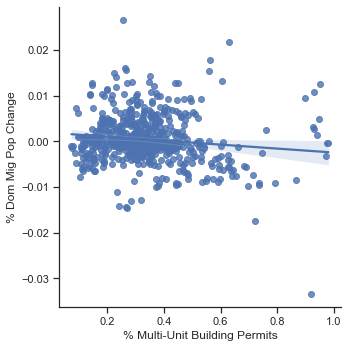

In [103]:
# State: Share of population change due to domestic migration vs. share of building permits for multi-unit structures

sns.lmplot(x = '% Multi-Unit Building Permits', y = '% Dom Mig Pop Change', data = dfstatesub2)

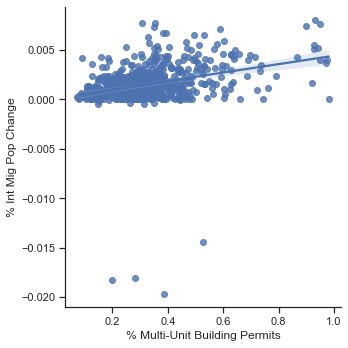

In [104]:
# State: Share of population change due to international migration vs. share of building permits for multi-unit structures

sns.lmplot(x = '% Multi-Unit Building Permits', y = '% Int Mig Pop Change', data = dfstatesub2)

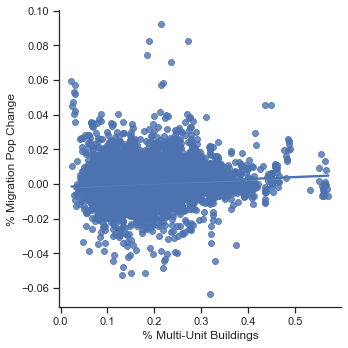

In [105]:
# Metro: Share of population change due to net migration vs. share of existing buildings that are multi-unit

sns.lmplot(x = '% Multi-Unit Buildings', y = '% Migration Pop Change', data = dfmetrosub2)

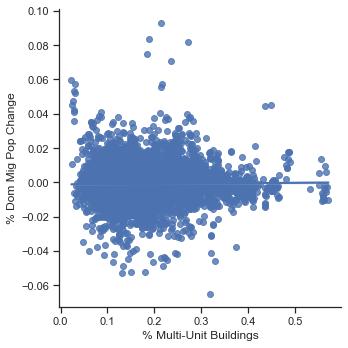

In [106]:
# Metro: Share of population change due to domestic migration vs. share of existing buildings that are multi-unit

sns.lmplot(x = '% Multi-Unit Buildings', y = '% Dom Mig Pop Change', data = dfmetrosub2)

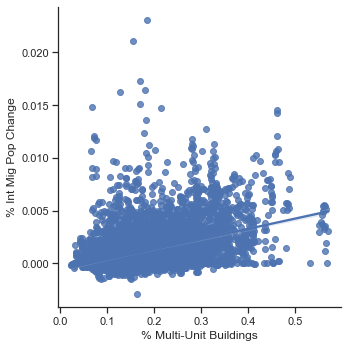

In [107]:
# Metro: Share of population change due to international migration vs. share of existing buildings that are multi-unit

sns.lmplot(x = '% Multi-Unit Buildings', y = '% Int Mig Pop Change', data = dfmetrosub2)

Firstly, the international migration data looks odd - it seldom dips below 0. Why is that? Nonetheless, there does seem to be a trend there. Generally, it looks like there is *some* migration to places that have and that build more multi-unit housing, mostly due to international migration. Domestic migration is either not correlated or negatively correlated with more multi-unit housing. The trend appears to be that places with more multi-unit housing attract more foreign migrants and to some extent repel people already living there, possibly because people in the U.S. see it as a goal to end up in a single-family home, likely somewhere where there are more single-family homes.

###### Are state budgets affected by the presence of multi-unit housing or by population density? If so, how? Is more tax revenue collected in places where the population is more dense?

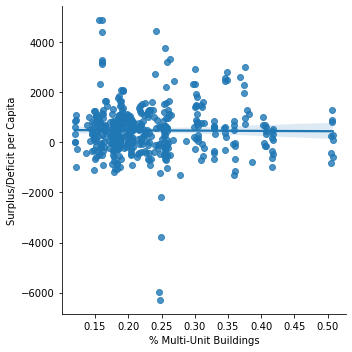

In [33]:
# State: share of multi-unit buildings vs. annual surplus/deficit per capita

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Surplus/Deficit per Capita', data = dfstatesub2)

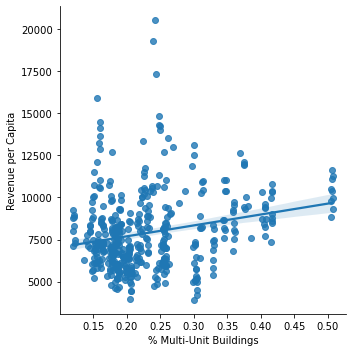

In [34]:
# State: share of multi-unit buildings vs. annual revenue per capita

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Revenue per Capita', data = dfstatesub2)

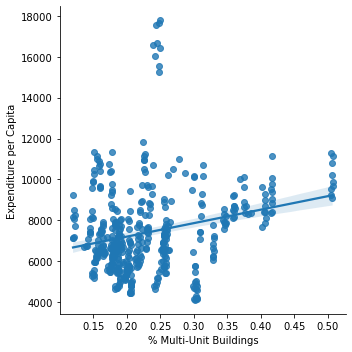

In [35]:
# State: share of multi-unit buildings vs. annual expenditure per capita

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Expenditure per Capita', data = dfstatesub2)

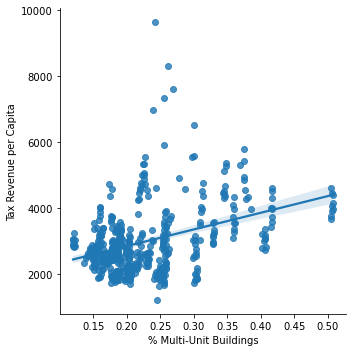

In [36]:
# State: share of multi-unit buildings vs. annual tax revenue per capita

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Tax Revenue per Capita', data = dfstatesub2)

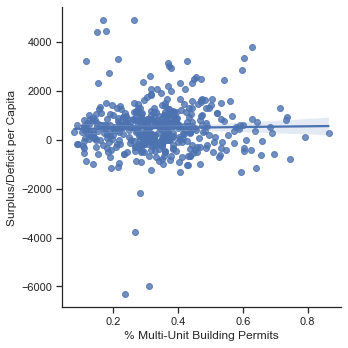

In [112]:
# State: share of multi-unit building permits vs. annual surplus/deficit per capita

sns.lmplot(x = '% Multi-Unit Building Permits', y = 'Surplus/Deficit per Capita', data = dfstatesub2)

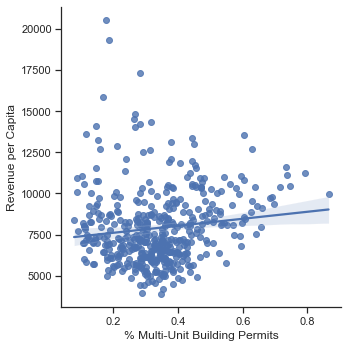

In [113]:
# State: share of multi-unit building permits vs. annual revenue per capita

sns.lmplot(x = '% Multi-Unit Building Permits', y = 'Revenue per Capita', data = dfstatesub2)

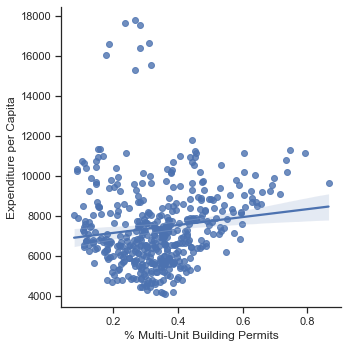

In [114]:
# State: share of multi-unit building permits vs. annual expenditure per capita

sns.lmplot(x = '% Multi-Unit Building Permits', y = 'Expenditure per Capita', data = dfstatesub2)

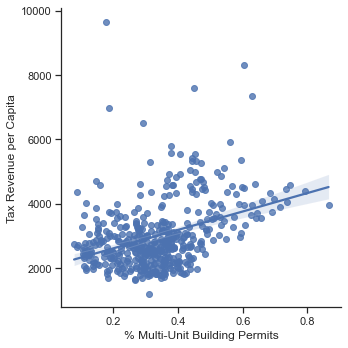

In [115]:
# State: share of multi-unit building permits vs. annual tax revenue per capita

sns.lmplot(x = '% Multi-Unit Building Permits', y = 'Tax Revenue per Capita', data = dfstatesub2)

Both revenue per capita and expenditure per capita go up as multi-unit housing goes up - interesting trends in their own rite that suggest cities that have and that build more multi-unit housing are also capable of taking in more money and spending more money. This implies that building multi-unit housing is a large factor of efficient city growth. Most importantly, *tax revenue per capita* increases as the share of multi-unit housing and permits in the state increase.  Population is controlled for here, which means that the more multi-unit housing there is in a state, the more tax revenue is earned overall. I.e. multi-unit housing is a good investment. This is good news.

###### Is the percentage of multi-unit housing permits or the percentage of multi-unit existing housing correlated with population density?

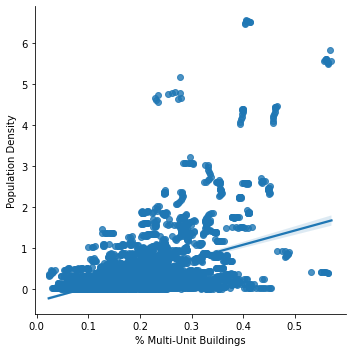

In [37]:
# Metro: share of multi-unit buildings vs. population density

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Population Density', data = dfmetrosub2)

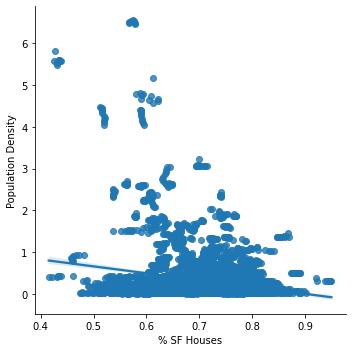

In [38]:
# Showing the inverse
# Metro: share of single family houses vs. population density

sns.lmplot(x = '% SF Houses', y = 'Population Density', data = dfmetrosub2)

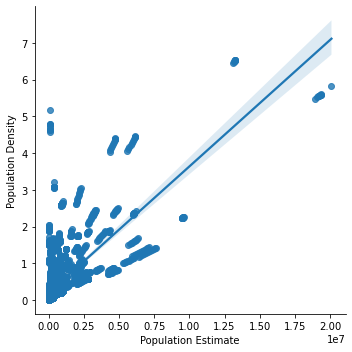

In [39]:
# Metro: overall population vs. population density

sns.lmplot(x = 'Population Estimate', y = 'Population Density', data = dfmetrosub2)

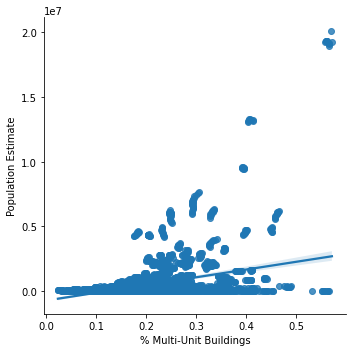

In [40]:
# Metro: share of multi-unit buildings vs. overall population

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Population Estimate', data = dfmetrosub2)

The correlation coefficient for multi-unit buildings and population density is .51, representing a moderate/strong relationship. On the flipside it is -.23 for single-unit houses and population density. The population is more dense when there is more multi-unit housing.

###### How does the presence of multi-unit housing affect the value of other single-unit homes in the area?

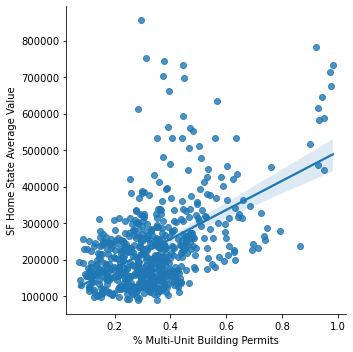

In [41]:
# State: Share of building permits for multi-unit structures vs. the average value of single family homes

sns.lmplot(x = '% Multi-Unit Building Permits', y = 'SF Home State Average Value', data = dfstatesub2)

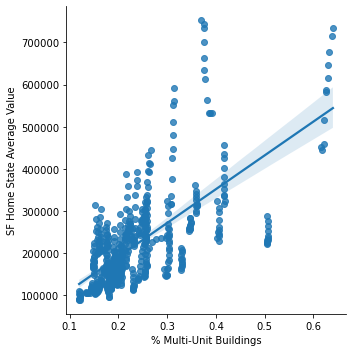

In [42]:
# State: Share of multi-unit buildings vs. the average value of single family homes

sns.lmplot(x = '% Multi-Unit Buildings', y = 'SF Home State Average Value', data = dfstatesub2)

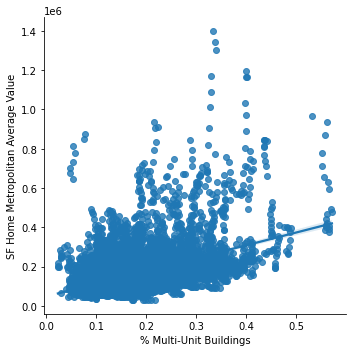

In [43]:
# Metro: Share of multi-unit buildings vs. the average value of single family homes

sns.lmplot(x = '% Multi-Unit Buildings', y = 'SF Home Metropolitan Average Value', data = dfmetrosub2)

The answer is clear - the price of SF houses are higher when more multi-unit buildings are present and when more are being built. Correlation is not causation, of course. What I *really* want to prove however is that the price of SF houses goes up *more* than it would otherwise when less multi-unit housing is built, and I would expect this trend to be more pronounced the more people move to that area. The idea is that with SF houses, supply is limited, therefore demand (and therefore *price*) will increase the more people move there.

###### What effects does the presence of multi-unit housing have on an area's walkability, access to transit, car ownership, and employment?

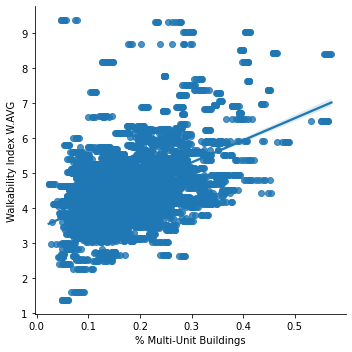

In [44]:
# Metro: Share of multi-unit buildings vs. weighted average of the entire metro area's walkability index

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Walkability Index W.AVG', data = dfmetrosub2)

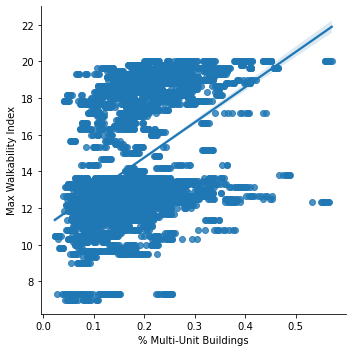

In [45]:
# Metro: Share of multi-unit buildings vs. the metro area's highest walkability index

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Max Walkability Index', data = dfmetrosub2)

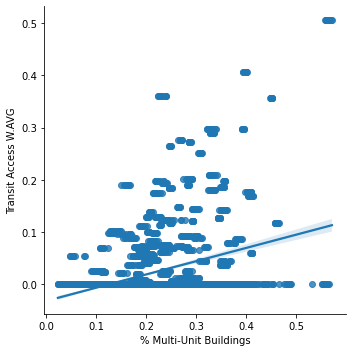

In [46]:
# Metro: Share of multi-unit buildings vs. weighted average of the entire metro area's transit accessibility (within 1/2 mile)

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Transit Access W.AVG', data = dfmetrosub2)
# the 0 values are supposed to be there (the U.S. doesn't have great transit access in most places)

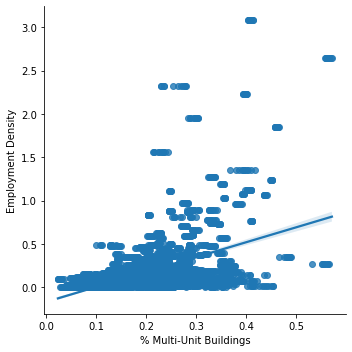

In [47]:
# Metro: Share of multi-unit buildings vs. the employment density of the metro area (jobs/acre)

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Employment Density', data = dfmetrosub2)

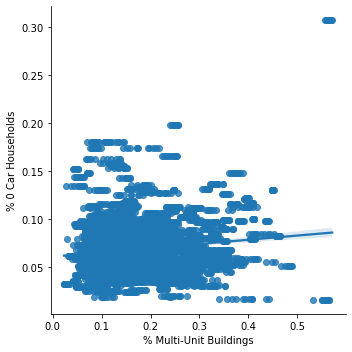

In [48]:
# Metro: Share of multi-unit buildings vs. share of 0 car households

sns.lmplot(x = '% Multi-Unit Buildings', y = '% 0 Car Households', data = dfmetrosub2)

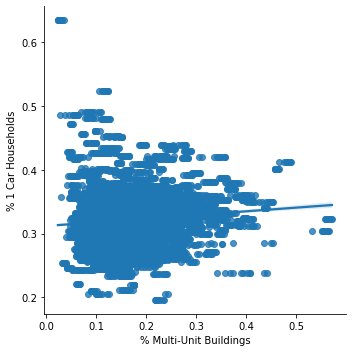

In [49]:
# Metro: Share of multi-unit buildings vs. share of 1 car households

sns.lmplot(x = '% Multi-Unit Buildings', y = '% 1 Car Households', data = dfmetrosub2)

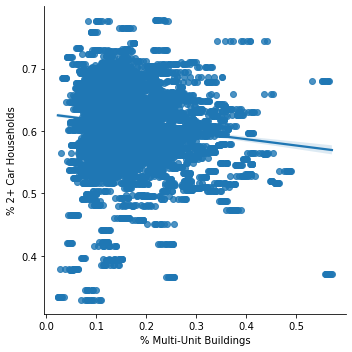

In [50]:
# Metro: Share of multi-unit buildings vs. share of 2+ car households

sns.lmplot(x = '% Multi-Unit Buildings', y = '% 2+ Car Households', data = dfmetrosub2)

More multi-unit housing, as expected, correlates with walkability, transit accessibility and employment density. The effect on car ownership is not as pronounced, likely because it is so popular in the U.S. to own at least one car. Still, where there is more multi-unit housing, you are less likely to find households with 2 or more cars.

### 4. Categorical Plot

<AxesSubplot:xlabel='Annual SF Home Appreciation (HPI)', ylabel='Count'>

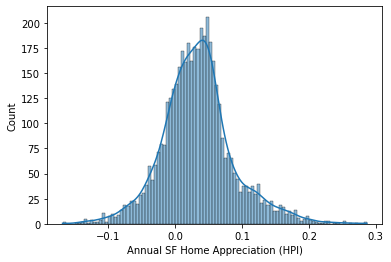

In [51]:
# Histogram of HPI, measure of annual average home price appreciation/depreciation

sns.histplot(dfmetrosub2['Annual SF Home Appreciation (HPI)'], bins = 100, kde = True)

In [73]:
dfmetropolitan = dfmetro.loc[dfmetro['Type'] == 'Metropolitan']

In [74]:
dfmetropolitan.loc[dfmetropolitan['Annual SF Home Appreciation (HPI)'] < 0, 'HPI Category'] = 'Depreciation'

C:\Users\Lex\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Lex\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [75]:
dfmetropolitan.loc[(dfmetropolitan['Annual SF Home Appreciation (HPI)']) >= 0 & (dfmetropolitan['Annual SF Home Appreciation (HPI)'] < 0.1), 'HPI Category'] = 'Normal Appreciation'

In [76]:
dfmetropolitan.loc[dfmetropolitan['Annual SF Home Appreciation (HPI)'] >= 0.1, 'HPI Category'] = 'High Appreciation'

In [77]:
dfmetropolitan['HPI Category'].value_counts(dropna = False)

# NaNs due to HPI only being measured in "Metropolitan Areas" - this data set includes "Micropolitan Areas" as well.

Normal Appreciation    2904
Depreciation            989
High Appreciation       461
NaN                     276
Name: HPI Category, dtype: int64

In [88]:
dfmetropolitan2 = dfmetropolitan.loc[(dfmetropolitan['HPI Category'] == 'Depreciation') | (dfmetropolitan['HPI Category'] == 'Normal Appreciation') | (dfmetropolitan['HPI Category'] == 'High Appreciation')]

In [89]:
# Metro only subset excluding all NaNs

dfmetropolitan2['HPI Category'].value_counts(dropna = False)

Normal Appreciation    2904
Depreciation            989
High Appreciation       461
Name: HPI Category, dtype: int64

KeyboardInterrupt: 

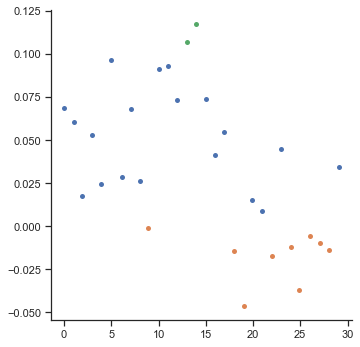

In [90]:
# Create a categorical plot in seaborn using the HPI categories created above
# For some reason, it doesn't seem to be taking the HPI category variable for the "hue" argument

sns.set(style="ticks")
sns.catplot(x = "% Multi-Unit Buildings" , y = "Annual SF Home Appreciation (HPI)", hue='HPI Category', data = dfmetropolitan2)

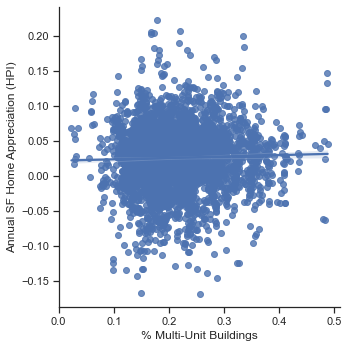

In [92]:
# Testing that a regular plot of these two variables works

sns.lmplot(x = '% Multi-Unit Buildings', y = 'Annual SF Home Appreciation (HPI)', data = dfmetropolitan2)

### 5. Pair Plots

In [98]:
dfstatestub3 = dfstatesub2[['Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)', 'SF Home State Average Value',
       '% Population Change', '% Int Mig Pop Change',
       '% Dom Mig Pop Change', '% SF Building Permits',
       '% Multi-Unit Building Permits',
       '% SF Houses', '% Multi-Unit Buildings', 'Rent Median (Dollars)',
       '% Revenue from Taxes',
       'Revenue per Capita', 'Tax Revenue per Capita',
       'Expenditure per Capita', 'Surplus/Deficit per Capita']]

In [96]:
dfmetrosub3 = dfmetrosub2[['Residential Density', 'Population Density',
       'Employment Density', 'Walkability Index W.AVG',
       'Transit Access W.AVG',
       'Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)',
       'SF Home Metropolitan Average Value',
       '% Population Change', '% Int Mig Pop Change',
       '% Dom Mig Pop Change', '% SF Houses',
       '% Multi-Unit Buildings',
       'HPI Category']]

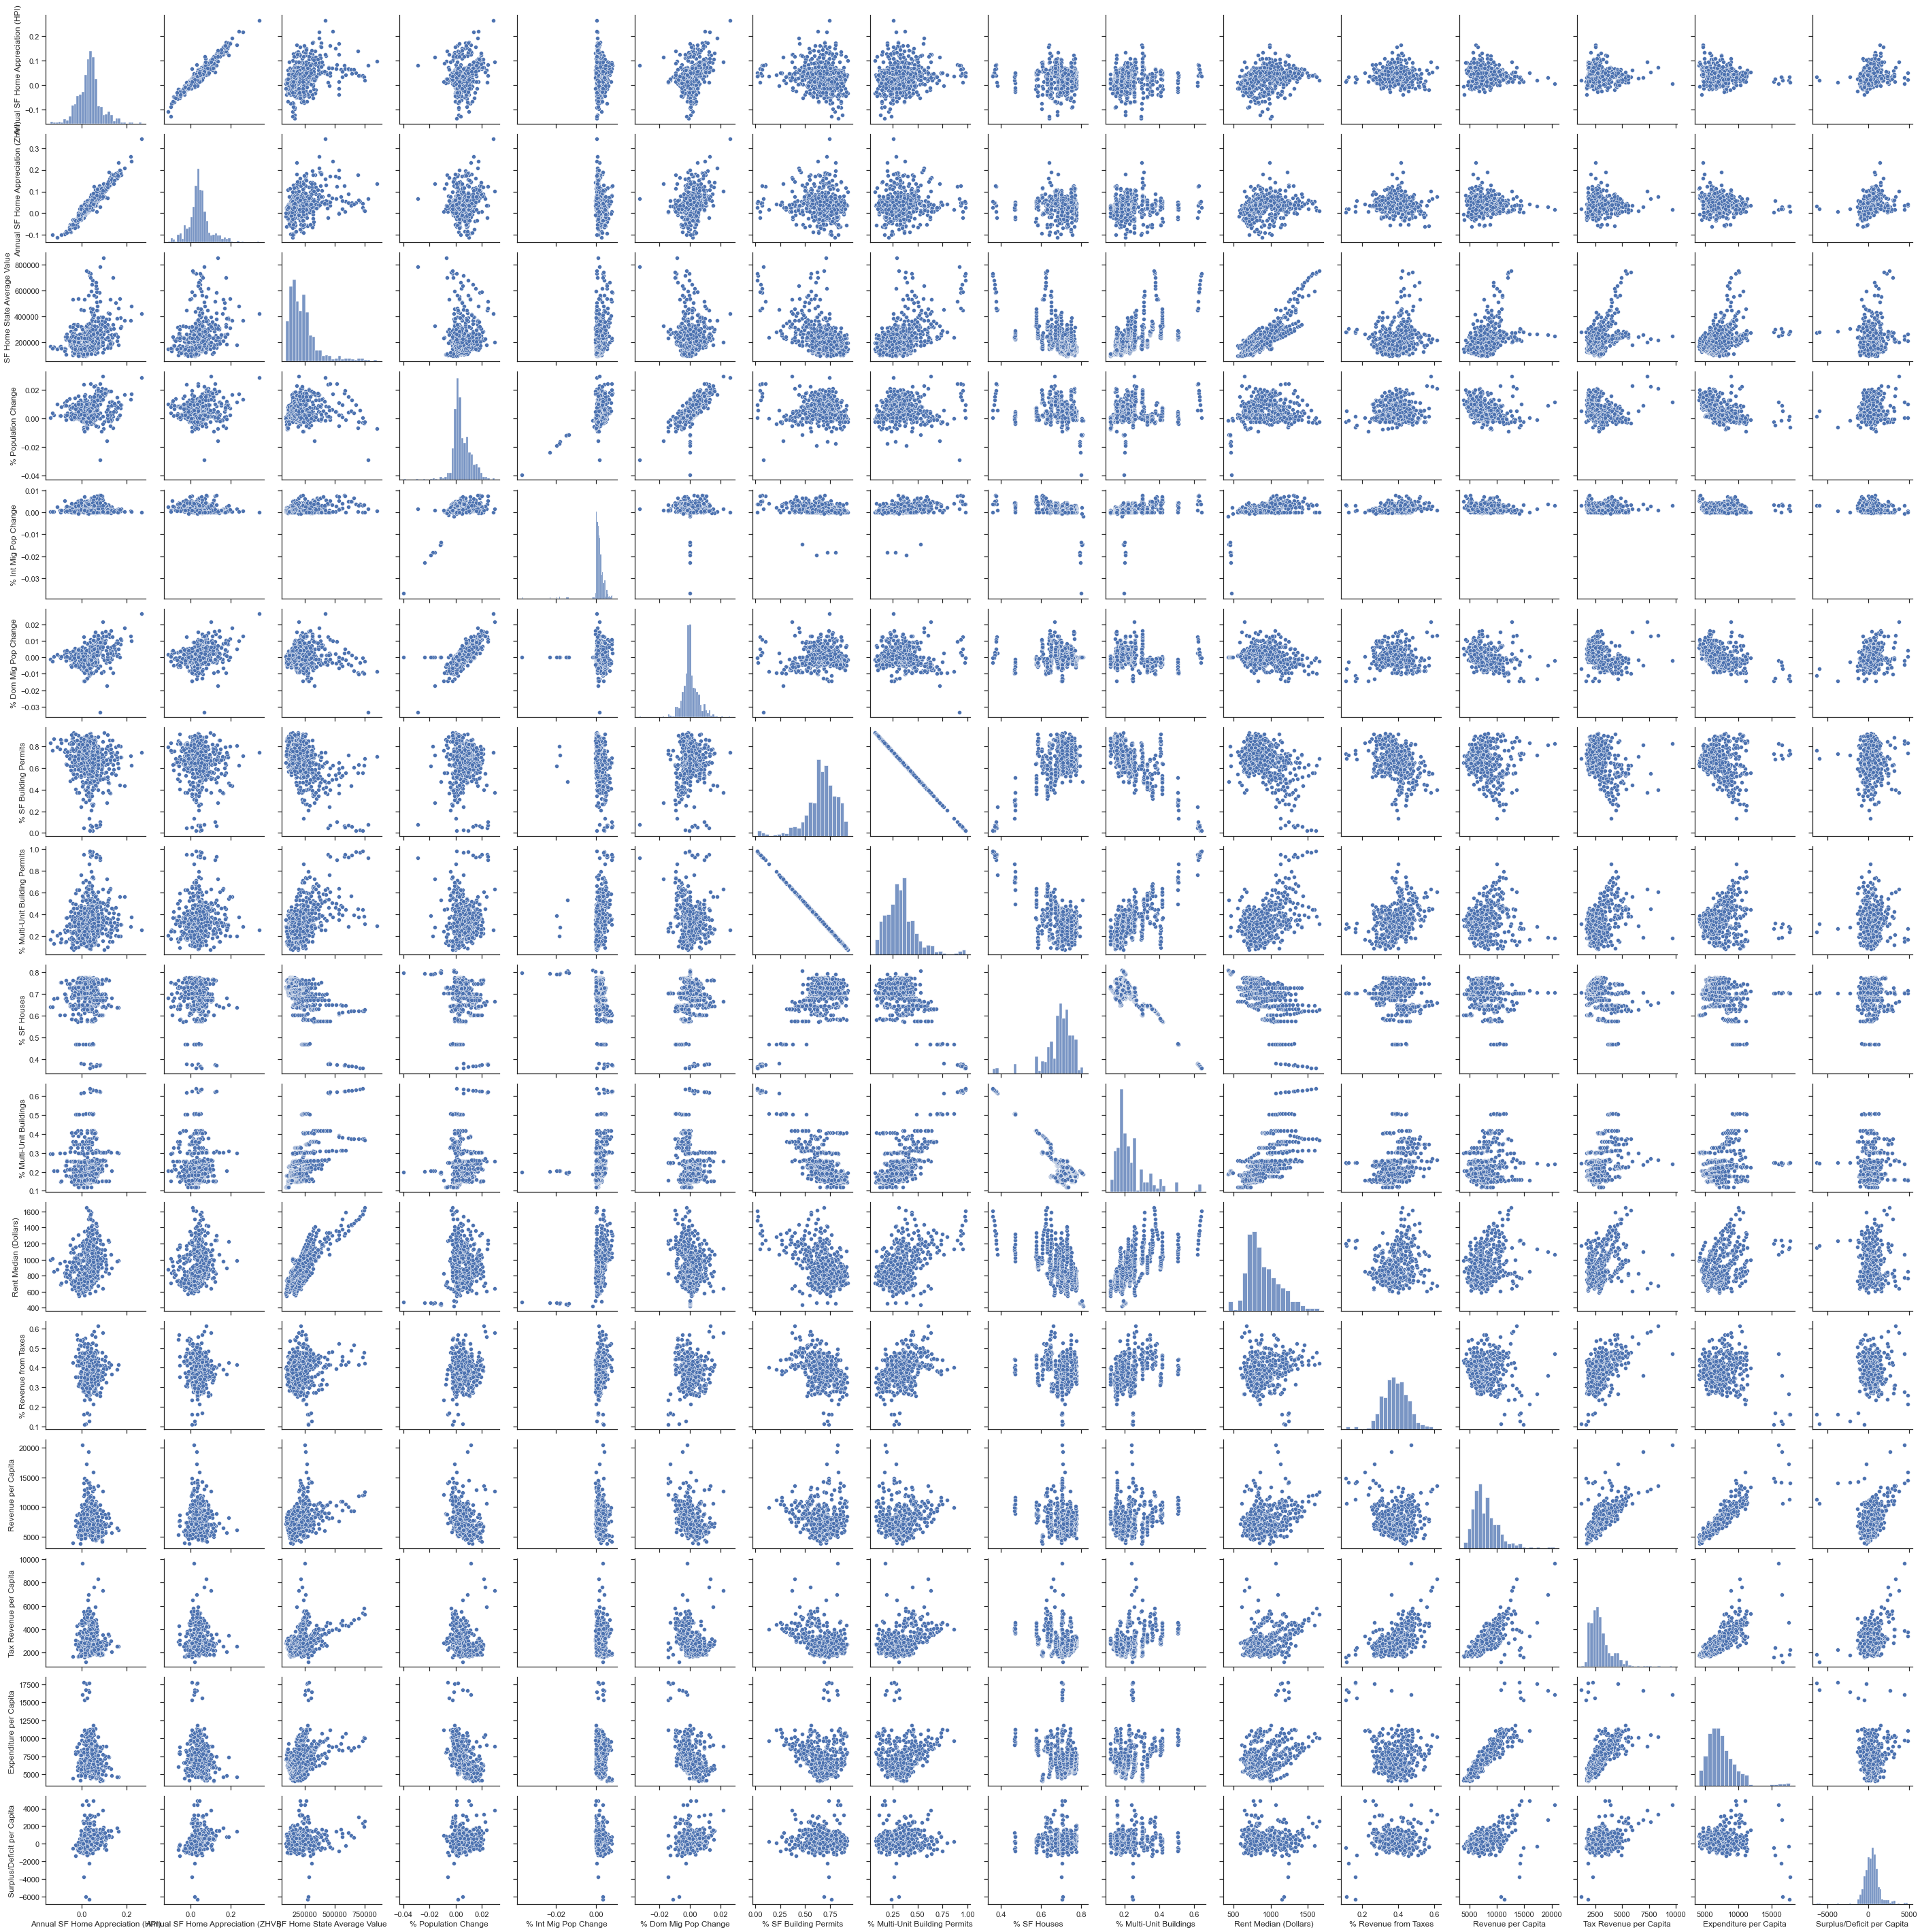

In [99]:
# Create a pair plot 

g = sns.pairplot(dfstatestub3)

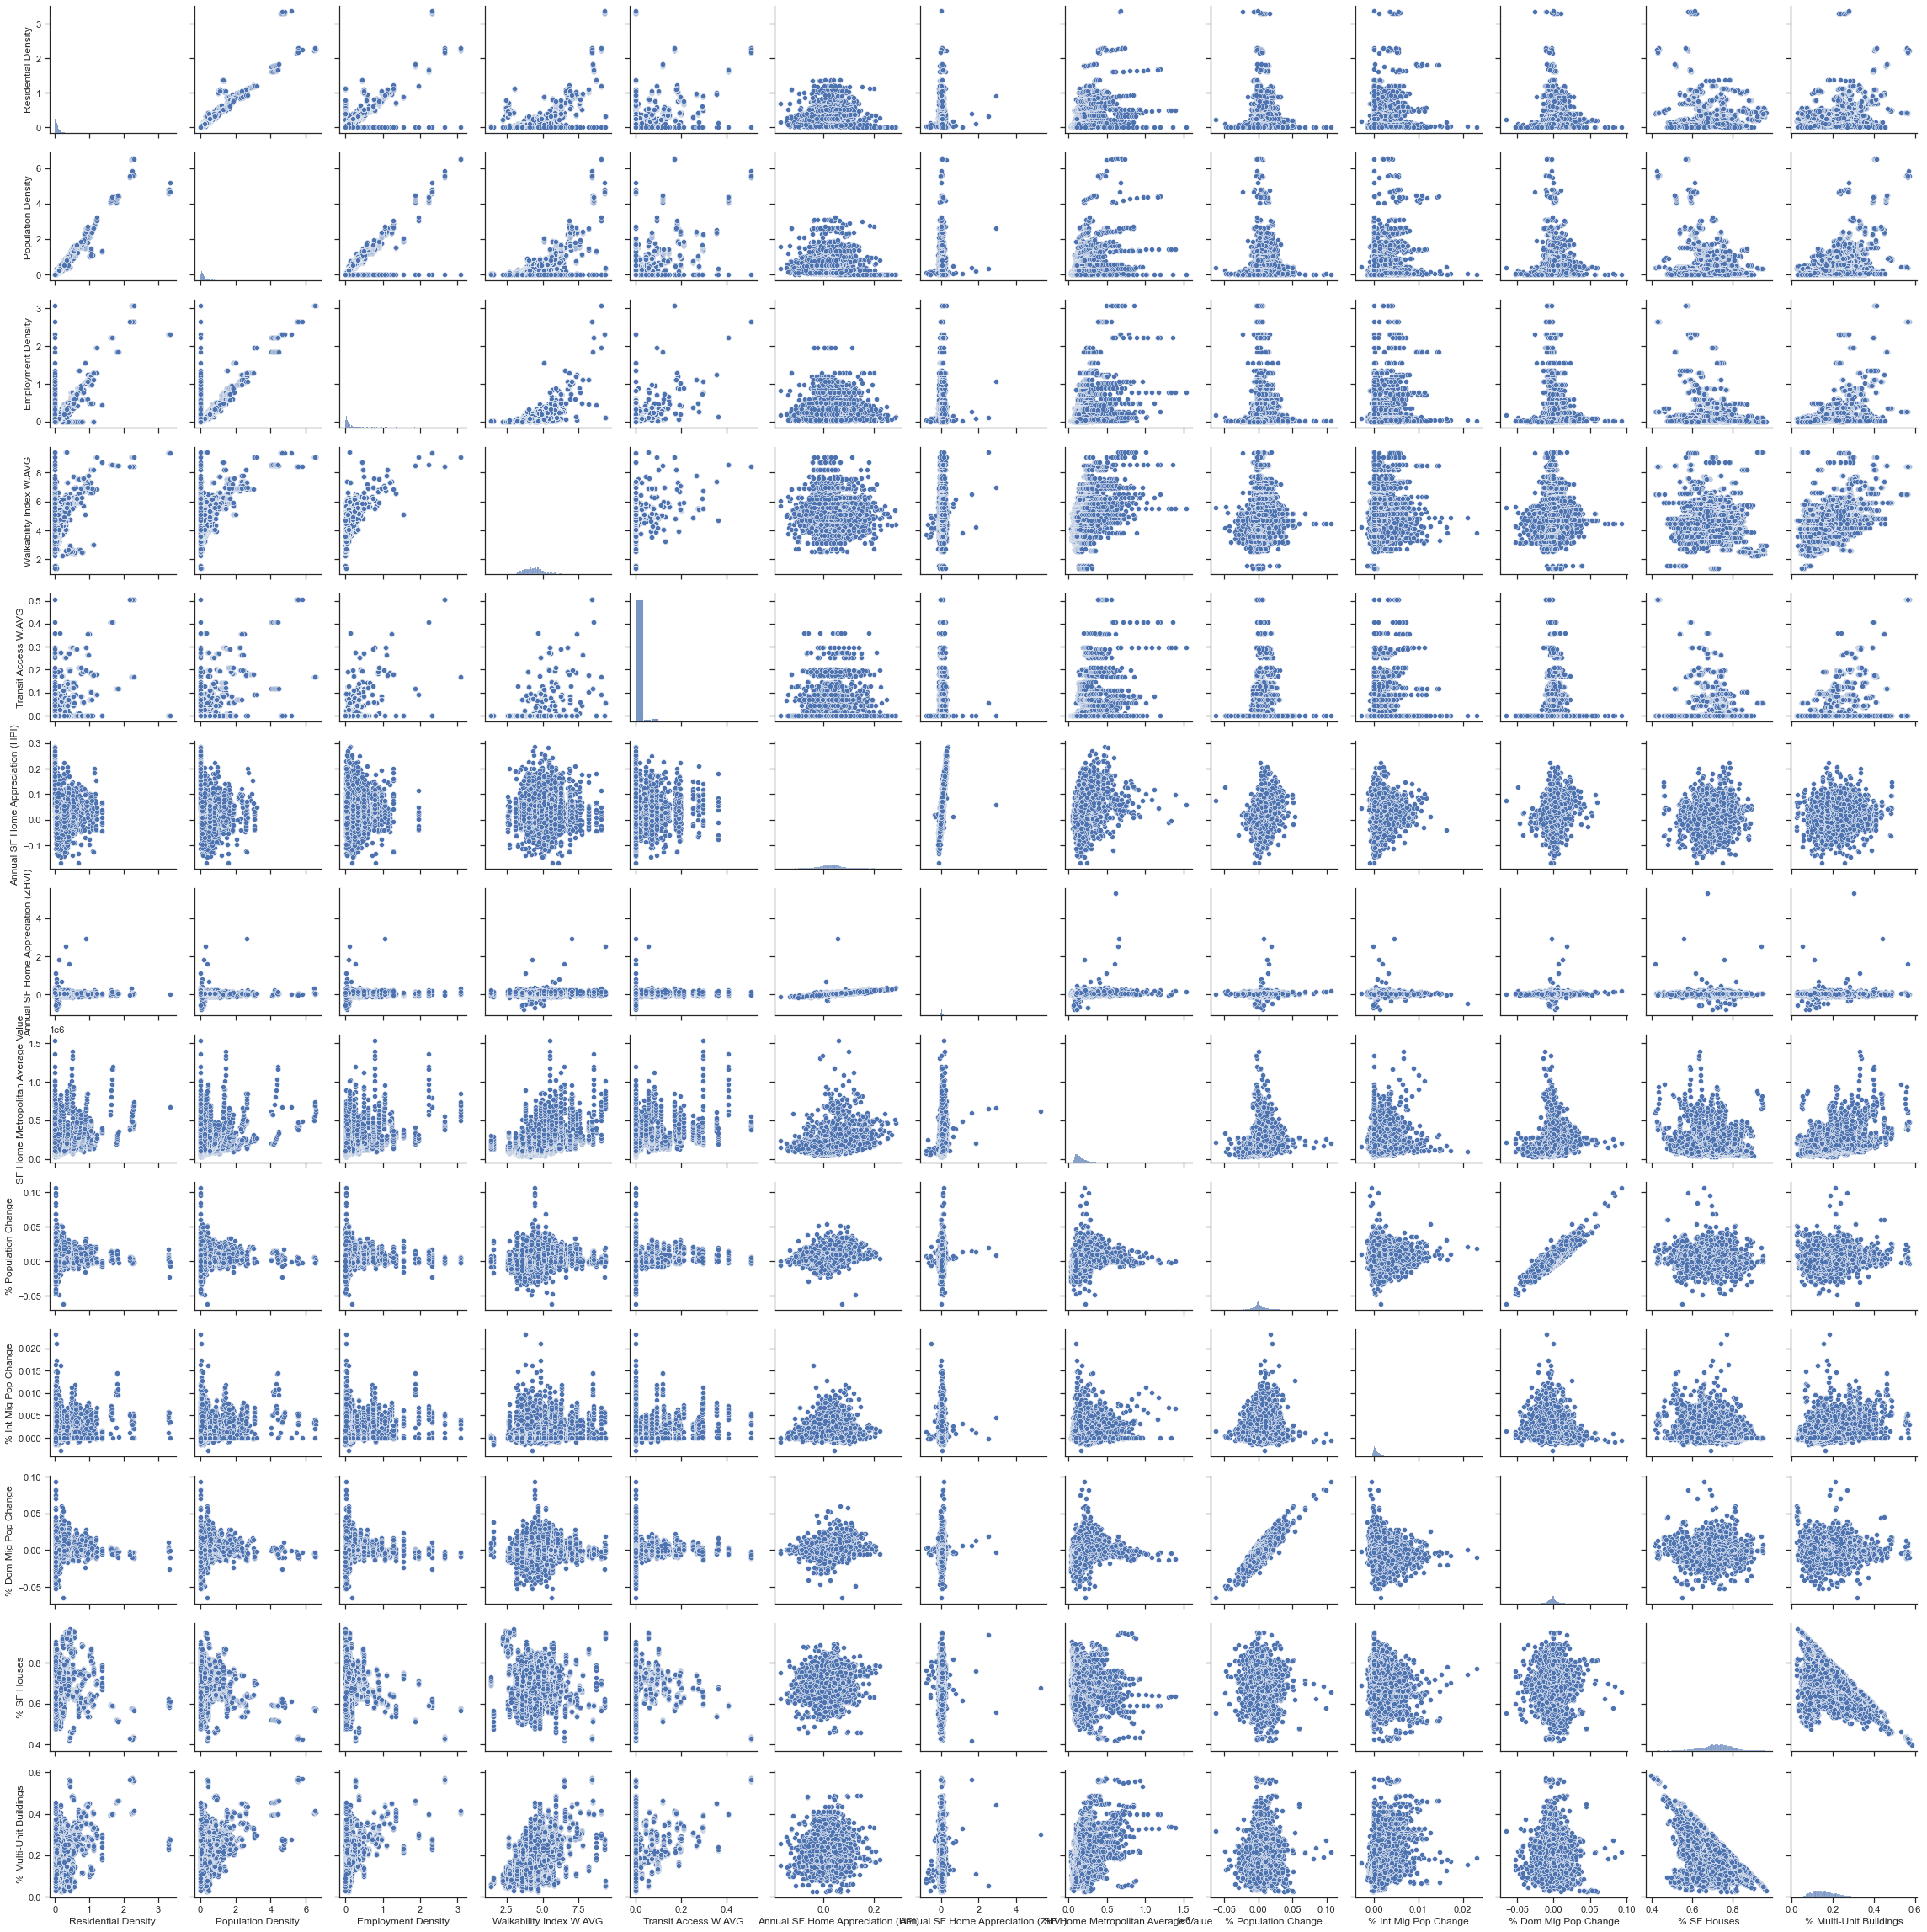

In [97]:
# Metro Pair Plot

h = sns.pairplot(dfmetrosub3)

### 6. New Hypotheses

###### Do more people move to metropolitan areas that build more multi-unit housing than those that don't?

Hypothesis: foreign immigrants move to places with more multi-unit housing and that build more multi-unit housing, and people moving within the U.S. tend somewhat to move to places with more SF housing and that build more SF housing.
Note: if this trend is true, it hints at unsustainability in the housing market.

###### Are state budgets affected by the presence of multi-unit housing or by population density? If so, how? Is more tax revenue collected in places where the population is more dense?

Hypothesis: multi-unit housing is a good investment for state governments to make/encourage, because revenue per capita, expenditure per captia AND tax revenue per capita all increase the more exists and the more gets built. Note: the implication is that building *up* makes cities more efficient in how they collect and spend their funds.

###### Is the percentage of multi-unit housing permits or the percentage of multi-unit existing housing correlated with population density?

Yes. Nothing more to investigate here - the correlation is coefficient is .51.

###### How does the presence of multi-unit housing affect the value of other single-unit homes in the area?

Hypothesis: even though the existence of multi-unit housing tends to correlate with higher SF house prices overall (cities are more expensive to live in), the price of SF housing increases *more* when *less* multi-unit housing is built than it would otherwise when *more* multi-unit housing is built, especially as the population of that area increases.

For example, 1 million people move to city A and 1 million people move to city B. City A builds both SF housing and multi-unit housing and increases its overall share of multi-unit housing by 10% and City B only builds more SF housing, so its share of multi-unit housing goes *down* by 5%. My hypothesis is, the price of SF housing in both cities will increase, but the price of SF housing in city A will go up LESS than that of city B.

###### What effects does the presence of multi-unit housing have on an area's walkability, access to transit, car ownership, and employment?

More multi-unit housing, as expected, correlates with walkability, transit accessibility and employment density. The effect on car ownership is not as pronounced, likely because it is so popular in the U.S. to own at least one car. Still, where there is more multi-unit housing, you are less likely to find households with 2 or more cars.

###### reference of subset columns:

In [59]:
dfstatesub2.columns

Index(['Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)', 'SF Home State Average Value',
       '% Population Change', '% Migration Pop Change', '% Int Mig Pop Change',
       '% Dom Mig Pop Change', '% SF Building Permits',
       '% Multi-Unit Building Permits', '% 2 Unit Building Permits',
       '% 3-4 Unit Building Permits', '% 5+ Unit Building Permits',
       '% SF Houses', '% Multi-Unit Buildings', '% 1-Unit Detached Houses',
       '% 1-Unit Attached Houses', '% 2 Unit Buildings',
       '% 3-4 Unit Buildings', '% 5-9 Unit Buildings',
       '% 10-19 Unit Buildings', '% 20+ Unit Buildings',
       'Owner-Occupied Unit Value Median (Dollars)', 'Rent Median (Dollars)',
       '% Surplus/Deficit of Revenue', '% Revenue from Taxes',
       'Revenue per Capita', 'Tax Revenue per Capita',
       'Expenditure per Capita', 'Surplus/Deficit per Capita'],
      dtype='object')

In [60]:
dfmetrosub2.columns

Index(['Unprotected Acreage', '% 0 Car Households', '% 1 Car Households',
       '% 2+ Car Households', 'Residential Density', 'Population Density',
       'Employment Density', 'Walkability Index W.AVG',
       'Max Walkability Index', 'Transit Access W.AVG',
       'Annual SF Home Appreciation (HPI)',
       'Annual SF Home Appreciation (ZHVI)',
       'SF Home Metropolitan Average Value', 'Population Estimate',
       '% Population Change', '% Migration Pop Change', '% Int Mig Pop Change',
       '% Dom Mig Pop Change', '% 1-Unit Detached Houses',
       '% 1-Unit Attached Houses', '% SF Houses', '% 2 Unit Buildings',
       '% 3-4 Unit Buildings', '% 5-9 Unit Buildings',
       '% 10-19 Unit Buildings', '% 20+ Unit Buildings',
       '% Multi-Unit Buildings', '% Mobile Homes', '% Boats, RVs, Vans, Etc.',
       'Owner-Occupied Unit Value Median (Dollars)', 'Rent Median (Dollars)',
       'HPI Category'],
      dtype='object')